<a href="https://colab.research.google.com/github/PX2145-2025/week-8-b-pickering-robin-r2/blob/main/Year_2_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [2]:
# Exercise 1

In [3]:
# Part 1

In [4]:
t = np.linspace(0,10,1000)

In [5]:
def f(y, t): # return derivatives of the array y
    k = 10.0
    m = 1.0
    return [ y[1], # the first equation dy[0]/dt
            -(k/m)*y[0] # the second equation dy[1]/dt
           ]

yinit = [0.1, 0] # TWO initial values, y and y'
y = odeint(f, yinit , t)

In [6]:
dy = y[:,0]
d2y = y[:,1]

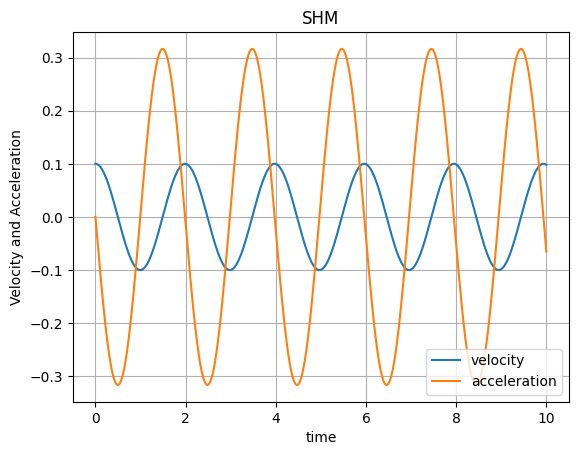

In [7]:
plt.plot(t, dy, label='velocity')
plt.plot(t, d2y, label='acceleration')

plt.xlabel('time')
plt.ylabel('Velocity and Acceleration')
plt.title('SHM')
plt.legend()
plt.grid()

In [8]:
# Part 2

In [9]:
def f_2(y, t, k, m):
    return [ y[1], # the first equation dy[0]/dt
            -(k/m)*y[0] # the second equation dy[1]/dt
           ]

y_2_init = [0.1, 0] # TWO initial values, y and y'
y_2 = odeint(f_2, y_2_init , t, args=(10,1,)) # args(k,m)

In [10]:
dy_2 = y_2[:,0]
d2y_2 = y_2[:,1]

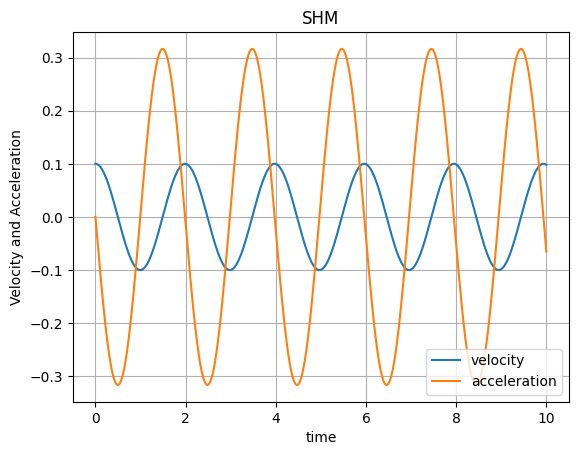

In [11]:
plt.plot(t, dy_2, label='velocity')
plt.plot(t, d2y_2, label='acceleration')

plt.xlabel('time')
plt.ylabel('Velocity and Acceleration')
plt.title('SHM')
plt.legend()
plt.grid()

In [12]:
# Part 3

In [13]:
def damped(y, t, k, m, b):
    return [ y[1], # the first equation dy[0]/dt
            -(k/m)*y[0] - (b/m)*y[1] # the second equation dy[1]/dt
           ]

y_3_init = [0.1, 0] # TWO initial values, y and y'
y_3 = odeint(damped, y_3_init , t, args=(10,1,0.5)) # args(k,m,b)

In [14]:
dy_3 = y_3[:,0]
d2y_3 = y_3[:,1]

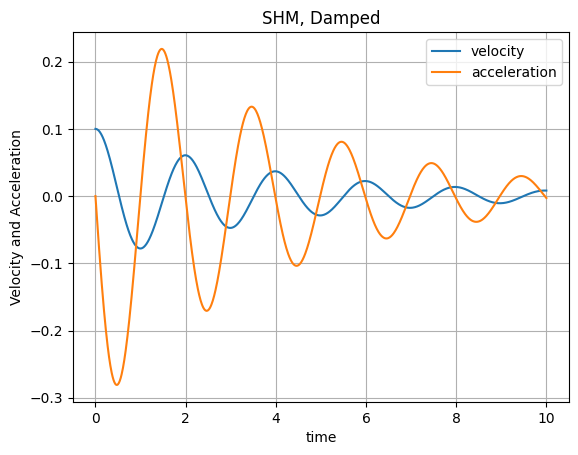

In [15]:
plt.plot(t, dy_3, label='velocity')
plt.plot(t, d2y_3, label='acceleration')

plt.xlabel('time')
plt.ylabel('Velocity and Acceleration')
plt.title('SHM, Damped')
plt.legend()
plt.grid()

In [16]:
# Part 4

In [17]:
!wget https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt

--2025-11-17 09:40:47--  https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25270 (25K) [text/plain]
Saving to: ‘spring_measurement.txt.5’

spring_measurement. 100%[===================>]  24.68K  --.-KB/s    in 0.002s  

2025-11-17 09:40:47 (9.83 MB/s) - ‘spring_measurement.txt.5’ saved [25270/25270]



In [18]:
t1, x1 = np.loadtxt("spring_measurement.txt", unpack = True)

/tmp/ipython-input-2390564108.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


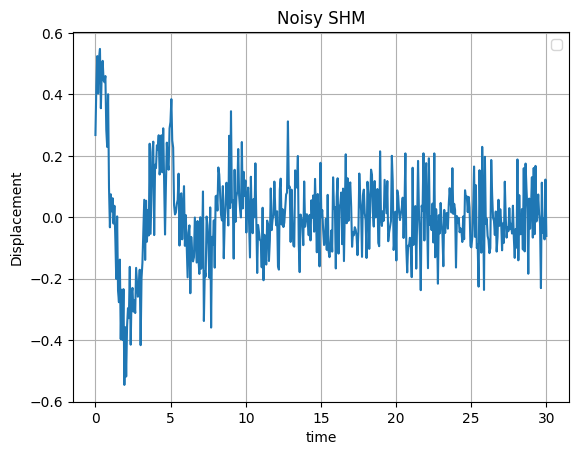

In [19]:
plt.plot(t1,x1)

plt.xlabel('time')
plt.ylabel('Displacement')
plt.title('Noisy SHM')
plt.legend()
plt.grid()

In [20]:
def func(t,b,k):
  m = 1
  x_init = [0.5,0]

  answer = odeint(damped, x_init, t, args=(b,k,m))
  return answer[:,0]

In [21]:
popt, pcov = curve_fit(func, t1, x1, p0=[1,1])

/tmp/ipython-input-1973536320.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


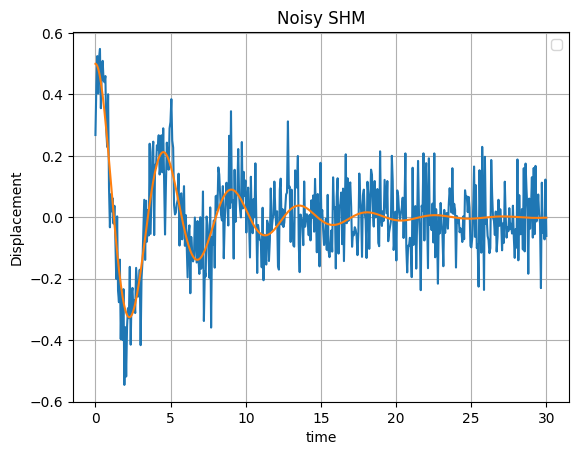

In [22]:
plt.plot(t1,x1)
plt.plot(t1, func(t1, *popt))

plt.xlabel('time')
plt.ylabel('Displacement')
plt.title('Noisy SHM')
plt.legend()
plt.grid()

In [23]:
print('k =',popt[0])
print('b =',popt[1])

k = 5.201535562534697
b = 2.638104647451209


In [24]:
# Exercise 2

In [25]:
def vdp(y, t, m, w, A):
    return y[1], (m*(1-y[0]**2)*y[1]) - y[0] + A*np.sin(w*t)

t2 = np.linspace(0,50,1000)
vdp_init = [1,0]
vdp_1 = odeint(vdp, vdp_init , t2, args=(8,0.6,1)) # args(m,k,b)

In [26]:
d1 = vdp_1[:,0]
d2 = vdp_1[:,1]

/tmp/ipython-input-4063412100.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


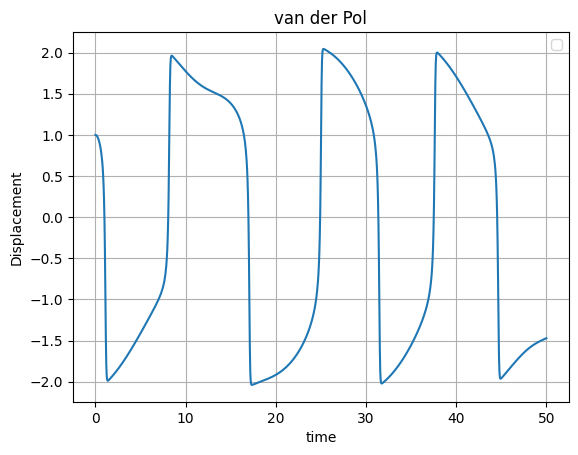

In [27]:
plt.plot(t2, d1)

plt.xlabel('time')
plt.ylabel('Displacement')
plt.title('van der Pol')
plt.legend()
plt.grid()

/tmp/ipython-input-1340796819.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


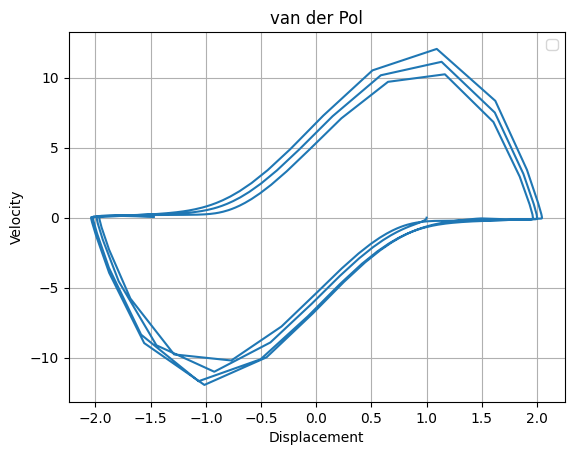

In [28]:
plt.plot(d1, d2)

plt.xlabel('Displacement')
plt.ylabel('Velocity')
plt.title('van der Pol')
plt.legend()
plt.grid()